In [ ]:
import pandas as pd


In [ ]:
movies_df = pd.read_csv('movies.csv')
print("Shape of 'movies.csv':", movies_df.shape)

Shape of 'movies.csv': (9742, 3)


In [ ]:
ratings_df = pd.read_csv('ratings.csv')
print("Shape of 'ratings.csv':", ratings_df.shape)

Shape of 'ratings.csv': (100836, 4)


In [ ]:
# Replace 'ratings.csv' with the actual file path
ratings_df = pd.read_csv('ratings.csv')

# Get the number of unique userId values
unique_user_ids = ratings_df['userId'].nunique()

# Display the result
print("Number of unique userIds in 'ratings.csv':", unique_user_ids)


Number of unique userIds in 'ratings.csv': 610


In [ ]:
# Merge the data frames based on a movieID
merged_df = pd.merge(ratings_df,movies_df, on='movieId', how='inner')

merged_df



,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


Which movie has recieved maximum number of user ratings?


In [ ]:
# Group by movieId and count the number of ratings for each movie
movie_ratings_count = ratings_df.groupby('movieId')['userId'].count()

# Find the movieId with the maximum number of ratings
max_rated_movie_id = movie_ratings_count.idxmax()
print(max_rated_movie_id)
max_rated_movie_title = merged_df.loc[merged_df['movieId'] == max_rated_movie_id, 'title'].iloc[0]
print("Movie with the maximum number of user ratings is:", max_rated_movie_title)

356
Movie with the maximum number of user ratings is: Forrest Gump (1994)


Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [ ]:
tags_df = pd.read_csv('tags.csv')

# Assuming 'Matrix, The (1999)' movieId is known
matrix_movie_id = 2571

# Filter tags for the specific movie
matrix_tags = tags_df[tags_df['movieId'] == matrix_movie_id]

# Display the result
print("Tags submitted by users for 'Matrix, The (1999)':")
print(matrix_tags[['userId', 'tag']])


Tags submitted by users for 'Matrix, The (1999)':
      userId                 tag
815      424        martial arts
816      424              sci-fi
1646     474  alternate universe
2794     537          philosophy
2795     537    post apocalyptic


What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [ ]:
# Filter ratings for the movie "Terminator 2: Judgment Day"
terminator_ratings = merged_df[merged_df['title'] == 'Terminator 2: Judgment Day (1991)']

# Calculate the average rating for the movie
average_rating = terminator_ratings['rating'].mean()

print("Average rating for 'Terminator 2: Judgment Day':",average_rating)

Average rating for 'Terminator 2: Judgment Day': 3.970982142857143


How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

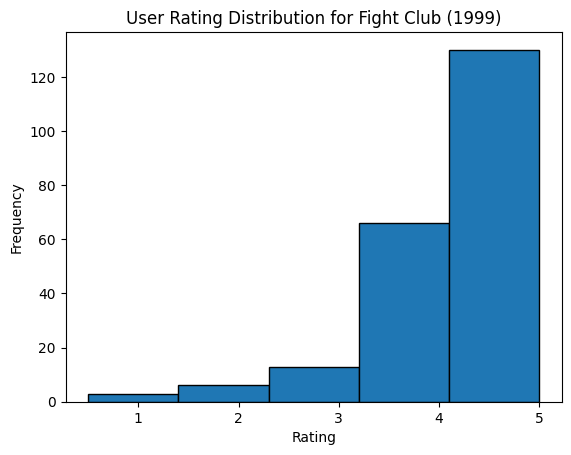

count    218.000000
mean       4.272936
std        0.861384
min        0.500000
25%        4.000000
50%        4.500000
75%        5.000000
max        5.000000
Name: rating, dtype: float64


In [ ]:
#Filter ratings for the movie "Fight Club (1999)"
fight_club_ratings = merged_df[merged_df['title'] == 'Fight Club (1999)']

# Check the data distribution of user ratings using a histogram
plt.hist(fight_club_ratings['rating'], bins=5, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('User Rating Distribution for Fight Club (1999)')
plt.show()

# Alternatively, you can use descriptive statistics to summarize the ratings
rating_stats = fight_club_ratings['rating'].describe()
print(rating_stats)

 IMPORTANT NOTE 1

In [ ]:
# Step 1: Group user ratings by movieId and apply aggregation operations
ratings_df = pd.read_csv('ratings.csv')  # Assuming you have a 'ratings.csv' file
grouped_ratings = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()

# Rename columns for clarity
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']

# Step 2: Inner join with the 'movies.csv' dataframe
movies_df = pd.read_csv('movies.csv')  # Assuming you have a 'movies.csv' file
merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')

# Step 3: Filter movies with more than 50 user ratings
filtered_movies = merged_df[merged_df['rating_count'] > 50]

# Display the result
print(filtered_movies)


      movieId                             title  \
0           1                  Toy Story (1995)   
1           2                    Jumanji (1995)   
2           3           Grumpier Old Men (1995)   
5           6                       Heat (1995)   
6           7                    Sabrina (1995)   
...       ...                               ...   
8287   106782   Wolf of Wall Street, The (2013)   
8354   109374  Grand Budapest Hotel, The (2014)   
8358   109487               Interstellar (2014)   
8457   112852    Guardians of the Galaxy (2014)   
8673   122904                   Deadpool (2016)   

                                           genres  rating_count  rating_mean  
0     Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                      Adventure|Children|Fantasy           110     3.431818  
2                                  Comedy|Romance            52     3.259615  
5                           Action|Crime|Thriller           102     3.9

In [ ]:
filtered_movies.to_csv('file.csv', index=False)

Which movie is the most popular based on  average user ratings?


In [ ]:
#Group the ratings by movieId and calculate count and mean
ratings_grouped = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']})

# Rename the columns for clarity
ratings_grouped.columns = ['rating_count', 'rating_mean']

# Merge the grouped ratings with the movies dataframe based on movieId
merged_df = pd.merge(movies_df, ratings_grouped, left_on='movieId', right_index=True, how='inner')

# Filter movies with more than 50 user ratings
popular_movies = merged_df[merged_df['rating_count'] > 50]

# Find the movie with the highest average rating among the popular movies
most_popular_movie = popular_movies.loc[popular_movies['rating_mean'].idxmax()]

print(most_popular_movie)

movieId                                      318
title           Shawshank Redemption, The (1994)
genres                               Crime|Drama
rating_count                                 317
rating_mean                             4.429022
Name: 277, dtype: object


Select all the correct options which comes under top 5 popular movies based on number of user ratings

In [ ]:
# Sort the merged dataframe by the count of ratings in descending order
top_popular_movies = merged_df.sort_values(by='rating_count', ascending=False)

# Select the top 5 popular movies based on the number of user ratings
top_5_popular_movies = top_popular_movies.head(5)

print(top_5_popular_movies[['title', 'rating_count']])

                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1939                Matrix, The (1999)           278


Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [ ]:
# Identify Sci-Fi movies using the 'genres' column
sci_fi_movies = movies_df[movies_df['genres'].str.contains('Sci-Fi')]

# Merge Sci-Fi movies with ratings data
sci_fi_ratings = pd.merge(ratings_df, sci_fi_movies, on='movieId', how='inner')

# Group by movieId and count the number of ratings for each Sci-Fi movie
sci_fi_ratings_count = sci_fi_ratings.groupby('movieId')['userId'].count()

# Find the movieId with the third-highest number of ratings
third_most_popular_sci_fi_id = sci_fi_ratings_count.sort_values(ascending=False).index[2]

# Get the title of the third most popular Sci-Fi movie
third_most_popular_sci_fi_title = movies_df.loc[movies_df['movieId'] == third_most_popular_sci_fi_id, 'title'].iloc[0]

# Display the result
print("Third most popular Sci-Fi movie based on user ratings is:", third_most_popular_sci_fi_title)


Third most popular Sci-Fi movie based on user ratings is: Jurassic Park (1993)


IMPORTANT NOTE 2

In [ ]:
# Step 1: Read the links.csv file
links_df = pd.read_csv('links.csv')  # Replace 'links.csv' with the actual file path

# Step 2: Filter movies with more than 50 user ratings
# Assuming you already have the filtered_movies DataFrame from the previous example
filtered_movies = merged_df[merged_df['rating_count'] > 50]

# Step 3: Merge filtered_movies with links_df based on movieId
final_df = pd.merge(filtered_movies, links_df, on='movieId', how='inner')

# Step 4: Generate IMDb URLs using imdbId
final_df['imdb_url'] = 'http://www.imdb.com/title/tt' + final_df['imdbId'].astype(str) + '/'

# Display the result
print(final_df[['movieId', 'title', 'rating_count', 'rating_mean', 'imdb_url']])


     movieId                             title  rating_count  rating_mean  \
0          1                  Toy Story (1995)           215     3.920930   
1          2                    Jumanji (1995)           110     3.431818   
2          3           Grumpier Old Men (1995)            52     3.259615   
3          6                       Heat (1995)           102     3.946078   
4          7                    Sabrina (1995)            54     3.185185   
..       ...                               ...           ...          ...   
431   106782   Wolf of Wall Street, The (2013)            54     3.916667   
432   109374  Grand Budapest Hotel, The (2014)            52     3.778846   
433   109487               Interstellar (2014)            73     3.993151   
434   112852    Guardians of the Galaxy (2014)            59     4.050847   
435   122904                   Deadpool (2016)            54     3.833333   

                                 imdb_url  
0     http://www.imdb.com/title

Mention the movieId of the movie which has the highest IMDB rating.


In [ ]:
# Find the row with the highest IMDb rating
max_imdb_row = final_df.loc[final_df['rating_mean'].idxmax()]

# Extract the movieId of the movie with the highest IMDb rating
movieId_highest_imdb_rating = max_imdb_row['movieId']

# Display the result
print("Movie with the highest IMDb rating has movieId:", movieId_highest_imdb_rating)


Movie with the highest IMDb rating has movieId: 318


Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [ ]:
# Filter the DataFrame to include only Sci-Fi movies
scifi_movies_df = final_df[final_df['genres'].str.contains('Sci-Fi')]

# Find the row with the highest IMDb rating among Sci-Fi movies
max_imdb_row_scifi = scifi_movies_df.loc[scifi_movies_df['rating_mean'].idxmax()]

# Extract the movieId of the Sci-Fi movie with the highest IMDb rating
movieId_highest_imdb_rating_scifi = max_imdb_row_scifi['movieId']

# Display the result
print("Sci-Fi movie with the highest IMDb rating has movieId:", movieId_highest_imdb_rating_scifi)


Sci-Fi movie with the highest IMDb rating has movieId: 260
